# Homework 4

In this assignment you will get to work with graphs using the [graph-tool python module](https://graph-tool.skewed.de/).

Learning goals are:

* perform basic network analysis to create derived graph properties,
* visualize graphs and their properties.

For further background on `graph-tool` refer to the [graph tutorial slides](../graph-tutorial) and the [tutorial notebook](../graph-tool-tutorial-todo.ipynb). There you can also find instructions on how to use the `py36 conda` environment in the Big Data Lab, which has all required dependencies installed.

**Submission:** Fill your answers into [this notebook](HW4-graph-analysis.ipynb) and submit on CourSys.

In [187]:
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown
%matplotlib inline

import graph_tool.all as gt
print("graph-tool version: {}".format(gt.__version__.split(' ')[0]))

graph-tool version: 2.27


# Problem 1: Power grid analysis

In [188]:
g = gt.collection.data['power']
display(Markdown(gt.collection.descriptions['power']))

Power grid: An undirected, unweighted network representing the topology of the Western States Power Grid of the United States. Data compiled by D. Watts and S. Strogatz and made available on the web `here <http://cdg.columbia.edu/cdg/datasets>`_. Please cite D. J. Watts and S. H. Strogatz, Nature 393, 440-442 (1998). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_.

 In this graph an edge represents a power supply line. A node is either a generator, a transformator, or a substation.
 
**Task 1a**: Create a drawing of this graph that emphasizes nodes that have more than 10 incident power supply lines. Set the size of all other nodes to 0, but retain visibility of the power lines.

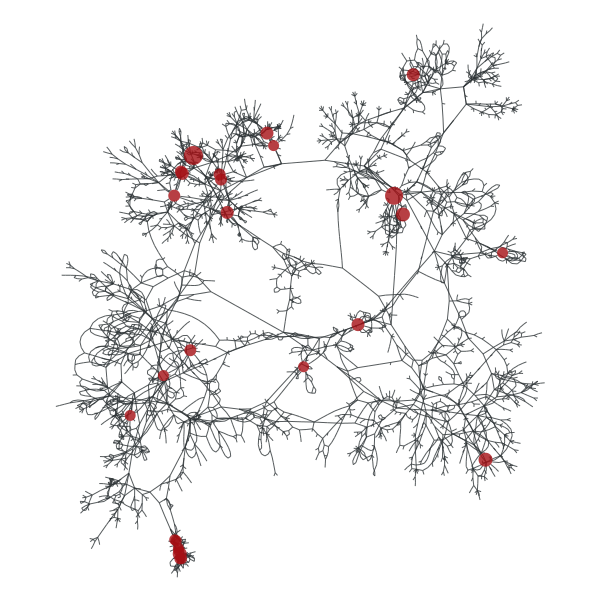

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2c34d57b8, at 0x7fc2b30d7ba8>

In [189]:
# TODO

**Task 1b:** Identify one of the centrality measures that can be used to indicate powerlines that act as a bridge between different parts of the network. Use this to emphasize structurally important nodes and powerlines.

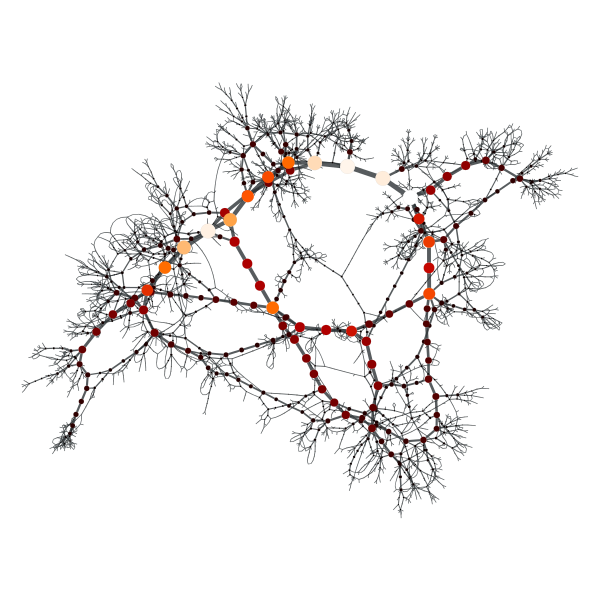

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2c34d57b8, at 0x7fc2c34b7978>

In [195]:
# TODO

# Problem 2: Small social graph visualization

In [206]:
X_knows = {
    'Mary': ['Peter', 'Albert', 'DavidF', 'Peter'],
    'Judy': ['Bob', 'Alan'],
    'Peter': ['Mary', 'DavidF', 'Jon'],
    'DavidF': ['Albert', 'Joseph', 'Peter', 'Mary'],
    'Jon': ['Peter', 'Joseph', 'DavidE'],
    'DavidE': ['Jon', 'Joseph', 'Albert'],
    'Joseph': ['DavidE', 'Jon', 'DavidF'],
    'Bob': ['Judy', 'Alan'],
    'Alan': ['Bob', 'Mary', 'Judy'],
    'Albert': ['DavidF', 'Mary', 'DavidE'],
}

**Task**: Create an undirected graph based on the information above, remove parallel edges, and draw it using a layout that resembles the tidy example given in the [lecture](../09_networks.pdf).

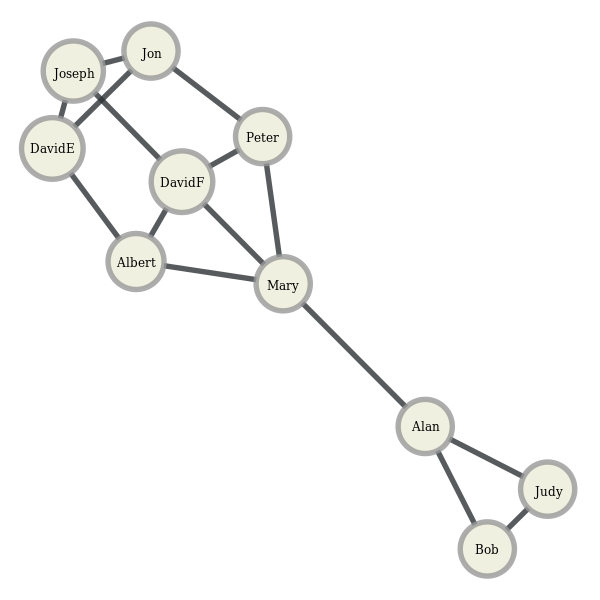

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2a1e3ec88, at 0x7fc2a1e3ecc0>

In [224]:
# TODO

# Problem 3: Facebook graph analysis

For the following question let us work with a real social graph of facebook friendship connections. Please download [`facebook_combined.txt` from SNAP](https://snap.stanford.edu/data/ego-Facebook.html), the Stanford Large Network Dataset Collection and create a `Graph` object with `graph-tool`. The dataset contains the ego networks of 10 facebook users, i.e. the friends of each of these users and the connections among those friends.

Goal of this questions is to use centrality measures to determine influencers among the users, not including the ego nodes themselves.

**Task 3a:** Load the dataset and create a drawing of the graph.

In [227]:
# TODO

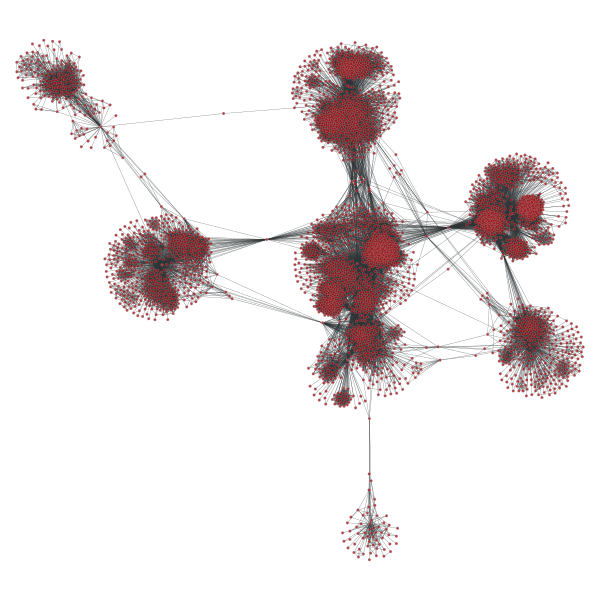

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2a1df88d0, at 0x7fc2dc176588>

In [229]:
# TODO

**Task 3b:** Calculate and show a histogram of pairwise distances among users, i.e. on the shortest paths of friendship connections among any pair of users. Use a log-scale to show the frequencies in the histogram. What is the diameter of this graph?

*Hint:* Calculating and drawing the histograms amounts to two lines of code using `gt` and `plt` modules.

In [230]:
# TODO

**Task 3c:** Determine influencers, i.e. people withing the ego network that are well connected among friends.

There are several steps to this analysis. First, remove the ego nodes. You can do this in an approximate way, simply by calculating a measure of influence of a user and removing the highest scoring nodes, assuming that these naturally are the ego nodes whose friends this network consists of.

Use `PageRank` as a measure of influence of a node.

*Step 1* - Create a GraphView and drawing what only retains nodes with a `pagerank` $< 0.002$.

In [ ]:
# TODO

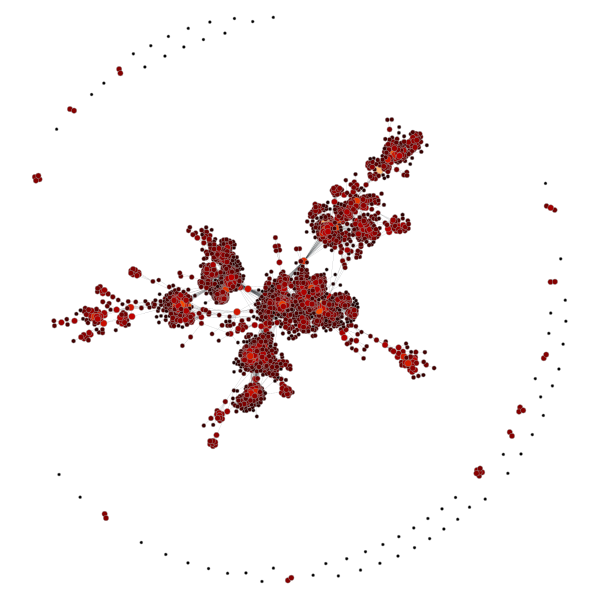

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2a1c2dfd0, at 0x7fc2a1bffc88>

In [234]:
# TODO

*Step 2* - Only retain the largest connected component of this graph, i.e. create another `GraphView` of only this largest component.

In [237]:
# TODO

*Step 3* - Recalculate pagerank for each node, choose a threshold (e.g. 0.0005) above which only a small part of the users are selected. Create a drawing that emphasizes these users that play central roles among their friends.

In [244]:
# TODO

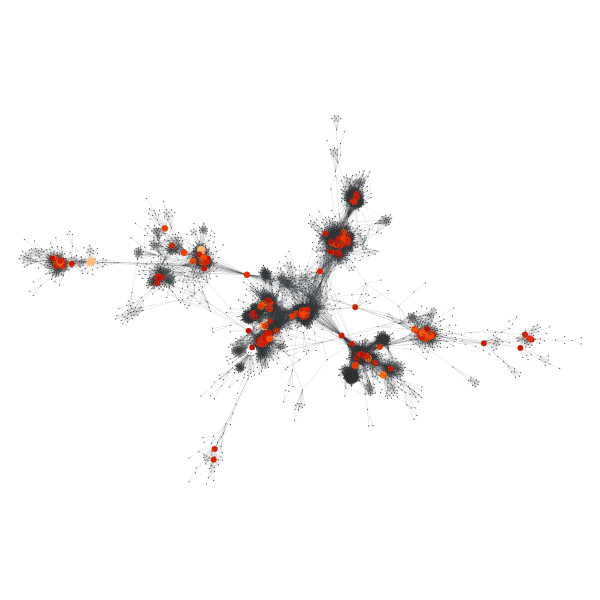

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fc2dc2b76a0, at 0x7fc2a1b70c50>

In [245]:
# TODO

# Problem 4: Graph drawing and Dimension reduction

Consider a graph $G$ consisting of $N$ nodes and $M$ relations (edges) having weights. Forcedirected
graph layouts (FDL) try to create a (2D) embedding of $G$ so that strongly related
nodes are placed close to each other. Now, consider a $K$-dimensional dataset $D$ of $N$ data
points. Dimensionality reduction (DR) methods try to create a (2D) embedding of $D$ so that
strongly related data points (in terms of their $K$-dimensional distances) are placed close to
each other. Given the similarities of the two types of techniques, how could we use a FDL
method to create a DR embedding for a given $K$-dimensional dataset $D$? And how could we
conversely use a DR method to create a graph layout for a given graph $G$?

*Hints:* To answer the question, first elaborate on the notation of both the graph $G$ and dataset
$D$. Next, define, in terms of the specific aspects of these datasets, what would be the corresponding
graph $G$ (for a $K$-dimensional dataset $D$) so that we could use a FDL on $G$ to create a
2D embedding of $D$; and conversely, what would be the corresponding dataset $D$ (for a graph
$G$), so we could use a DR method to create a 2D embedding of $G$.

[[A. Telea, Data Visualization - Principles and Practice](http://www.cs.rug.nl/svcg/DataVisualizationBook/DataVisualizationBook), Chapter 11]